In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

plt.style.use('ggplot')

SAVEPLOT=True

def base_plot(ax, df, **kwargs):
    ax.grid(False)
    return ax.imshow(df, **kwargs)
    
def set_ticklabels(ax, xchar, ychar):
    ax.set_xticks(range(8))
    _ = ax.set_xticklabels([f"{xchar}{_}" for _ in range(8)], size=20)
    ax.set_yticks(range(4))
    _ = ax.set_yticklabels([f"{ychar}{_}" for _ in range(4)], size=20)
    
def set_ticklabels_16(ax, xchar, ychar):
    ax.set_xticks(range(16))
    _ = ax.set_xticklabels([f"{xchar}{_}" for _ in range(16)], size=16, rotation=45)
    ax.set_yticks(range(4))
    _ = ax.set_yticklabels([f"{ychar}{_}" for _ in range(4)], size=16)

# For 8-3-8 MLP

In [2]:
wij = pd.read_csv('output/mlp_w_ij.csv',comment='#', names=[f"j{_}" for _ in range(4)])
wij.index = [f"i{_}" for _ in range(9)]
#drop bias column
wij = wij.drop(index=['i8'])

wjk = pd.read_csv('output/mlp_w_jk.csv',comment='#', names=[f"k{_}" for _ in range(8)])
wjk.index = [f"j{_}" for _ in range(4)]

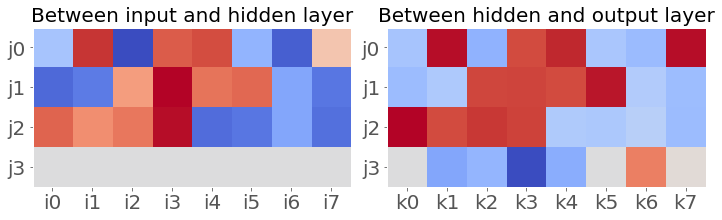

In [5]:
fig, (ax1,ax2) = plt.subplots(ncols=2)

fig.set_figwidth(10)
fig.set_figheight(3)

d = {'cmap' : 'coolwarm'}

im1 = base_plot(ax1, wij.T, **d)
im2 = base_plot(ax2, wjk, **d)

set_ticklabels(ax1, 'i', 'j')
set_ticklabels(ax2, 'k', 'j')

_=ax1.set_title("Between input and hidden layer", size=20)
_=ax2.set_title("Between hidden and output layer", size=20)

fig.tight_layout()

if SAVEPLOT:
    fig.savefig('plots/mlp_weights.png', dpi=300)

# For 16-3-16 MLP

In [5]:
wij = pd.read_csv('output/mlp16_wij.csv',comment='#', sep=' ', names=[f"j{_}" for _ in range(4)])
wij.index = [f"i{_}" for _ in range(17)]
#drop bias column
wij = wij.drop(index=['i16'])

wjk = pd.read_csv('output/mlp16_wjk.csv',comment='#', sep=' ', names=[f"k{_}" for _ in range(16)])
wjk.index = [f"j{_}" for _ in range(4)]

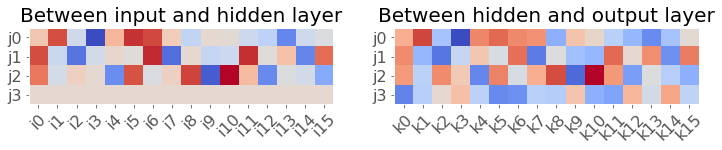

In [42]:
fig, (ax1,ax2) = plt.subplots(ncols=2)

fig.set_figwidth(10)
fig.set_figheight(3)

d = {'cmap' : 'coolwarm'}

im1 = base_plot(ax1, wij.T, **d)
im2 = base_plot(ax2, wjk, **d)

set_ticklabels_16(ax1, 'i', 'j')
set_ticklabels_16(ax2, 'k', 'j')

_=ax1.set_title("Between input and hidden layer", size=20)
_=ax2.set_title("Between hidden and output layer", size=20)

fig.tight_layout()

if SAVEPLOT:
    fig.savefig('plots/mlp16_w.png', dpi=300)